In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import keras

In [2]:
(train_img,train_lable),(test_img,test_lable)=tf.keras.datasets.mnist.load_data()

In [3]:
print(train_img.shape)
print(train_lable.shape)
print(test_img.shape)
print(test_lable.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [4]:
train_img=train_img/255
test_img=test_img/255

In [15]:
from keras import backend as K
def my_relu(x):
    return K.maximum(0.1, x)

# Sequantial Model

In [27]:
model=tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(10,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_13 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_25 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_26 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [19]:
model=tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(128))
# model.add(tf.keras.layers.Lambda(lambda x: tf.abs(x))) # lambda layer
model.add(tf.keras.layers.Lambda(my_relu)) # lambda layer using function
model.add(tf.keras.layers.Dense(10,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 128)               100480    
_________________________________________________________________
lambda_5 (Lambda)            (None, 128)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


# Non-sequantial Model

In [30]:
input1 = keras.layers.Input(shape=(28, 28))
x1 = keras.layers.Flatten()(input1)
x2 = keras.layers.Dense(28*28*2, activation='relu')(x1)
x3 = keras.layers.Dense(28*28, activation='relu')(x2)
x4 = keras.layers.add([x1, x3])
out = keras.layers.Dense(10, activation='softmax')(x4)
model = keras.models.Model(input1, out)
model.summary()

Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_15 (InputLayer)           [(None, 28, 28)]     0                                            
__________________________________________________________________________________________________
flatten_14 (Flatten)            (None, 784)          0           input_15[0][0]                   
__________________________________________________________________________________________________
dense_27 (Dense)                (None, 1568)         1230880     flatten_14[0][0]                 
__________________________________________________________________________________________________
dense_28 (Dense)                (None, 784)          1230096     dense_27[0][0]                   
_______________________________________________________________________________________

In [16]:
input1 = keras.layers.Input(shape=(28, 28))
x1 = keras.layers.Flatten()(input1)
x2 = keras.layers.Dense(28*28*2, activation='relu')(x1)
x3 = keras.layers.Dense(28*28)(x2)
x4 = keras.layers.Lambda(my_relu)(x3) # lambda layer using function
x5 = keras.layers.add([x1, x4])
out = keras.layers.Dense(10, activation='softmax')(x5)
model = keras.models.Model(input1, out)
model.summary()

Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 28, 28)]     0                                            
__________________________________________________________________________________________________
flatten_4 (Flatten)             (None, 784)          0           input_4[0][0]                    
__________________________________________________________________________________________________
dense_9 (Dense)                 (None, 1568)         1230880     flatten_4[0][0]                  
__________________________________________________________________________________________________
dense_10 (Dense)                (None, 784)          1230096     dense_9[0][0]                    
_______________________________________________________________________________________

# parameters initialization

In [20]:
keras.initializers.Zeros() # 全0
keras.initializers.Ones() # 全1
keras.initializers.RandomNormal(mean=0.0, stddev=0.05, seed=None) # 指定均值和方差的正态分布初始化
keras.initializers.RandomUniform(minval=-0.05, maxval=0.05, seed=None) # 指定下边界和上边界的均匀分布初始化
keras.initializers.TruncatedNormal(mean=0.0, stddev=0.05, seed=None) # 截尾高斯分布初始化，位于均值两个标准差以外的数据将会被丢弃并重新生成，形成截尾分布

# training

In [21]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['acc'])
history = model.fit(train_img,train_lable,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 905us/step - loss: 0.2593 - acc: 0.9266
Epoch 2/5
1875/1875 [==============================] - 2s 858us/step - loss: 0.1122 - acc: 0.9665
Epoch 3/5
1875/1875 [==============================] - 2s 889us/step - loss: 0.0782 - acc: 0.9768
Epoch 4/5
1875/1875 [==============================] - 2s 809us/step - loss: 0.0582 - acc: 0.9825
Epoch 5/5
1875/1875 [==============================] - 1s 785us/step - loss: 0.0453 - acc: 0.9858


# test

In [8]:
model.evaluate(test_img,test_lable)

313/313 [==============================] - 0s 630us/step - loss: 0.0987 - acc: 0.9755


[0.09867776185274124, 0.9754999876022339]

# history plotting

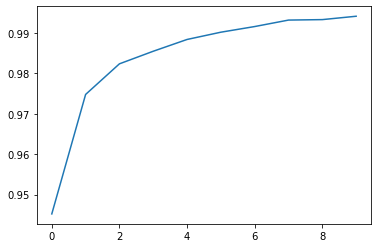

In [36]:
plt.plot(history.history['acc'])

# model save and load

In [37]:
model.save('./softmax_mnist_shortcut.h5')   #保存

In [33]:
new_model = keras.models.load_model('./softmax_mnist.h5')

# model visualization

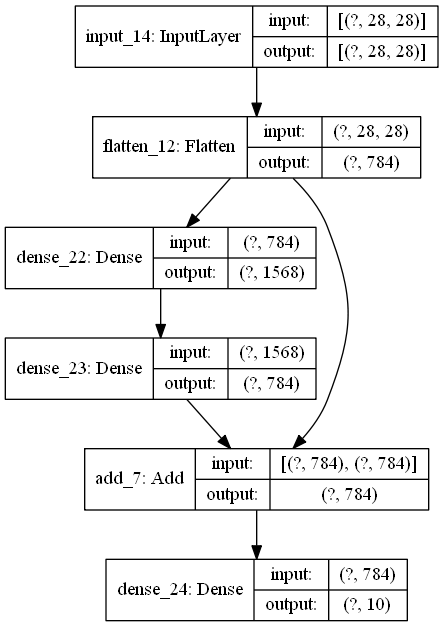

In [26]:
from keras.utils import plot_model
plot_model(model, show_shapes=True)